In [1]:
import glob
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from Functions.class_Graph_TM import Graph_TM
from networkx.algorithms.cluster import *
from networkx.algorithms.bridges import *
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

In [2]:
files = sorted(glob.glob('Data/*.csv'))
G = Graph_TM()
# G.insert_cbs(files)
G.insert_cbs(files, notid = True)

In [3]:
G.Graph.number_of_nodes()

241

Graph saved as ../TeX/Second set/img/all_comic_books_all_components_without_marks.png


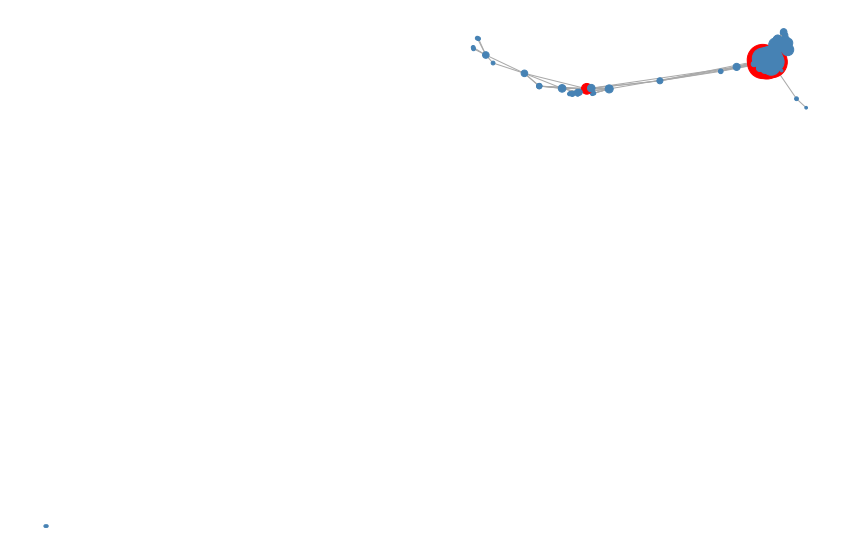

In [4]:
G.plot_network(max_node_size = 1000,
               max_connected_components = 'all',
               filename = 'all_comic_books_all_components_without_marks')

Graph saved as ../TeX/Second set/img/all_comic_books_biggest_component_without_marks.png


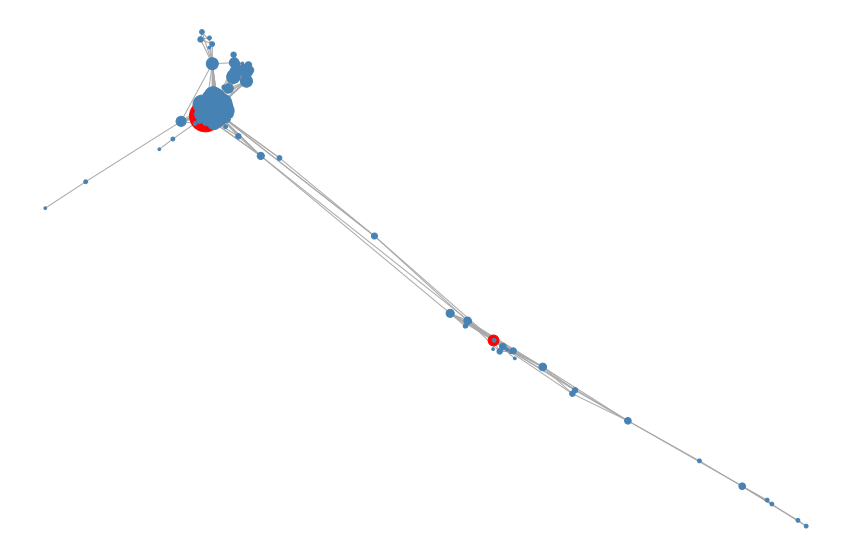

In [5]:
G.plot_network(max_node_size = 1000,
               filename = 'all_comic_books_biggest_component_without_marks')

In [6]:
connected_components = list(nx.connected_components(G.Graph))
GN = G.Graph.number_of_nodes()
GL = G.Graph.number_of_edges()
G_degrees = np.array(G.Graph.degree)[:,1].astype(int)
G_density = 2 * GL / (GN * (GN - 1))
G_std_degree = G_degrees.std()
G_max_degree = G_degrees.max()
G_hbridges = has_bridges(G.Graph)
if G_hbridges:
    G_bridges = list(bridges(G.Graph))
    
print(nx.info(G.Graph))
print(f'Density: {G_density:.4f}')
print(f'Maximum degree: {G_max_degree}')
print(f'Degree Standard Deviation: {G_std_degree:.4f}')
print(f'Connected components: {len(connected_components)}')
if G_hbridges:
    print(f'Number of bridges: {len(G_bridges)}')
    print('Bridges:')
    for i in range(len(G_bridges)):
        print(f'{i + 1:2d} - {G_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 241
Number of edges: 1884
Average degree:  15.6349
Density: 0.0651
Maximum degree: 139
Degree Standard Deviation: 21.8224
Connected components: 2
Number of bridges: 15
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Astronauta', 'Astronauta do Futuro')
 4 - ('Astronauta', 'Computador do Astronauta')
 5 - ('Penadinho', 'Fantasma do Sultão')
 6 - ('Piteco', 'Gronk')
 7 - ('Toneco', 'Pai do Toni')
 8 - ('Zé Lelé', 'Maria Cafufa')
 9 - ('Tina', 'Pipa')
10 - ('Tina', 'Maurício de Souza')
11 - ('Chico Bento', 'Nhô Lau')
12 - ('Chico Bento', 'Hiro')
13 - ('Chico Bento', 'Espírito do Milharal')
14 - ('Rolo', 'Verinha')
15 - ('Humberto', 'Eco')


In [7]:
# working only with the greatest connected component
H = nx.subgraph(G.Graph, connected_components[0])
avg_distance = nx.average_shortest_path_length(H)
H_diameter = diameter(H)
H_degrees = np.array(H.degree)[:,1].astype(int)
HN = H.number_of_nodes()
HL = H.number_of_edges()
H_density = 2 * HL / (HN * (HN - 1))
H_std_degree = H_degrees.std()
H_max_degree = H_degrees.max()
H_hbridges = has_bridges(H)
if H_hbridges:
    H_bridges = list(bridges(H))

print(nx.info(H))
print(f'Density: {H_density:.4f}')
print(f'Maximum degree: {H_max_degree}')
print(f'Degree Standard Deviation: {H_std_degree:.4f}')
print(f'Diameter: {H_diameter}')
print(f'Average distance: {avg_distance:.4f}')
if H_hbridges:
    print(f'Number of bridges: {len(H_bridges)}')

print(f'ln(N)/ln(<k>): {np.log(HN) / np.log(2 * HL / HN):.4f}')
if H_hbridges:
    print('Bridges:')
    for i in range(len(H_bridges)):
        print(f'{i + 1:2d} - {H_bridges[i]}')

Name: 
Type: Graph
Number of nodes: 239
Number of edges: 1883
Average degree:  15.7573
Density: 0.0662
Maximum degree: 139
Degree Standard Deviation: 21.8722
Diameter: 8
Average distance: 2.7105
Number of bridges: 14
ln(N)/ln(<k>): 1.9862
Bridges:
 1 - ('Mônica', 'Toneco')
 2 - ('Magali', 'Anjo da Guarda da Magali')
 3 - ('Astronauta', 'Astronauta do Futuro')
 4 - ('Astronauta', 'Computador do Astronauta')
 5 - ('Penadinho', 'Fantasma do Sultão')
 6 - ('Piteco', 'Gronk')
 7 - ('Toneco', 'Pai do Toni')
 8 - ('Zé Lelé', 'Maria Cafufa')
 9 - ('Tina', 'Pipa')
10 - ('Tina', 'Maurício de Souza')
11 - ('Chico Bento', 'Nhô Lau')
12 - ('Chico Bento', 'Hiro')
13 - ('Chico Bento', 'Espírito do Milharal')
14 - ('Humberto', 'Eco')


In [8]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            arrow = ' -> '
            print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
            print()

Path from Pipa to Pajé:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Pajé

Path from Pipa to Cacique:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Cacique

Path from Pipa to Cafuné:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Cafuné

Path from Pipa to Jurema:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema

Path from Pajé to Etê da Nave Mãe:
Pajé -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Cacique to Etê da Nave Mãe:
Cacique -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Cafuné to Etê da Nave Mãe:
Cafuné -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Jurema to Etê da Nave Mãe:
Jurema -> Papa-Capim -> Onça -> 

Graph saved as ../TeX/Second set/img/communities_all_components_without_marks.png


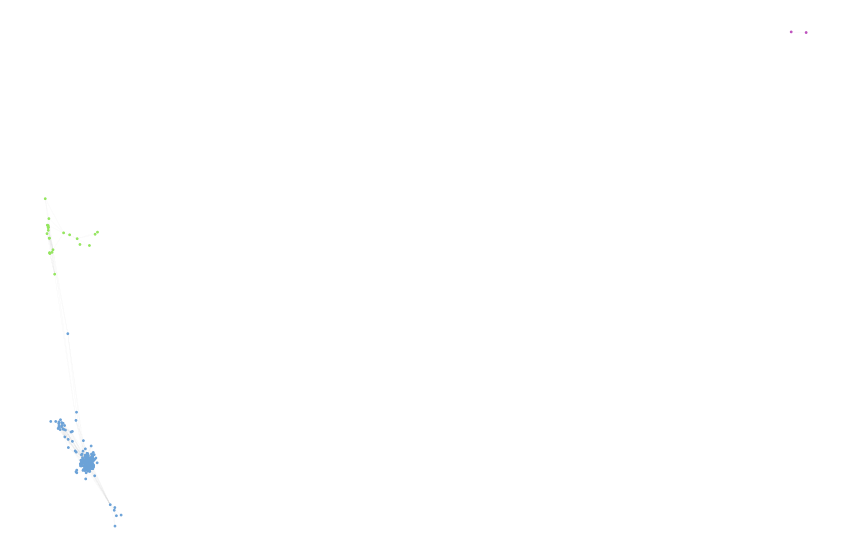

In [9]:
G.plot_communities(max_connected_components = 'all',
                   filename = 'communities_all_components_without_marks')

Graph saved as ../TeX/Second set/img/communities_biggest_component_without_marks.png


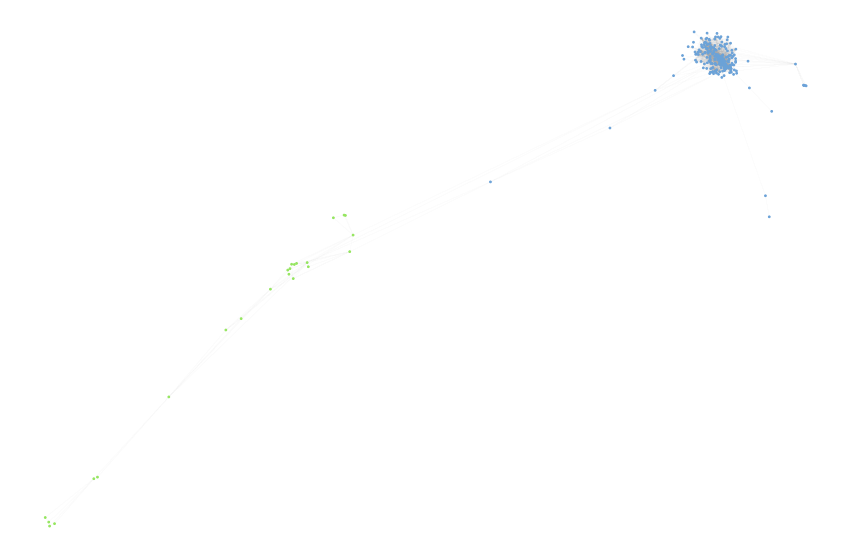

In [10]:
G.plot_communities(filename = 'communities_biggest_component_without_marks')

In [11]:
H['Cascão']['Cebolinha']

{'weight': 628.5, 'community': 1}

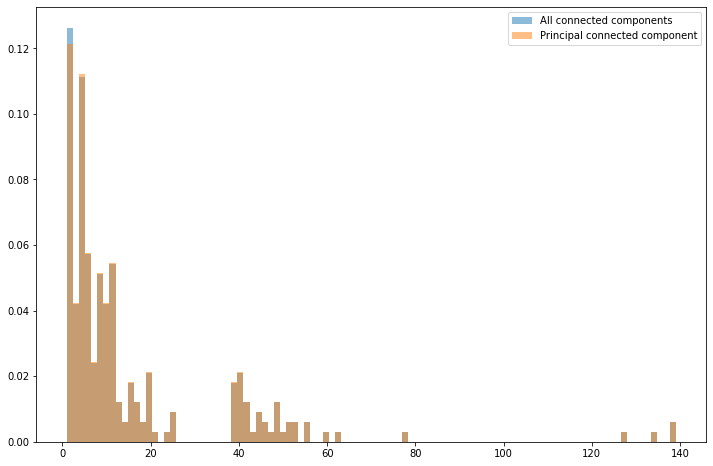

In [12]:
# degree distribuition
plt.figure(figsize = (12, 8))
plt.hist(G_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist(H_degrees,
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.savefig('../TeX/Second set/img/degree_distribuition_without_marks.png')
plt.show()

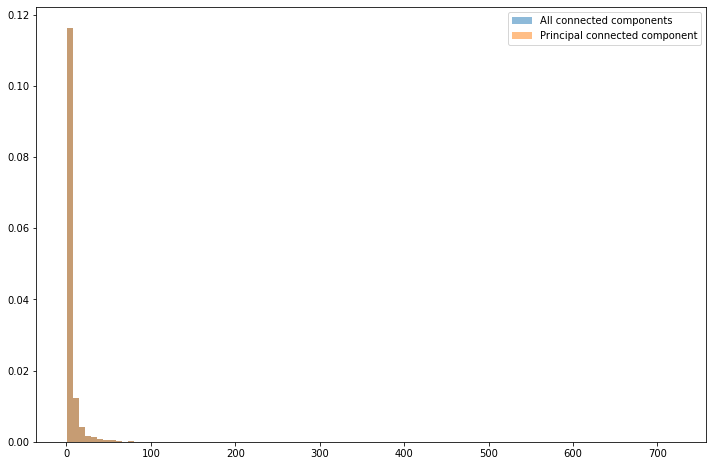

In [13]:
# weight distribuition
plt.figure(figsize = (12, 8))
plt.hist([float(G.Graph[u][v]['weight']) for u, v in G.Graph.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'All connected components')

plt.hist([float(H[u][v]['weight']) for u, v in H.edges()],
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Principal connected component')

plt.legend(loc = 'upper right')
plt.savefig('../TeX/Second set/img/weight_distribuition_without_marks.png')
plt.show()

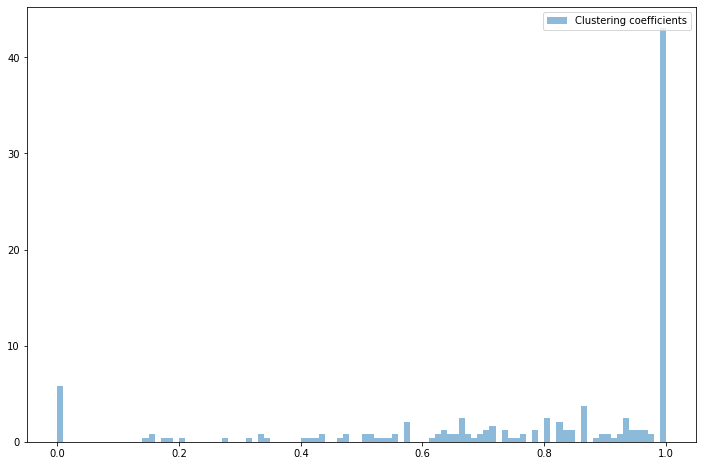

In [14]:
graph_clustering = clustering(H)
avg_clustering = average_clustering(H)
global_clustering = transitivity(H)
avg_clustering, global_clustering

# clustering coefficients distribuition
plt.figure(figsize = (12, 8))
plt.hist(list(graph_clustering.values()),
         bins = 100,
         density = True,
         alpha = 0.5,
         label = 'Clustering coefficients')

plt.legend(loc = 'upper right')
plt.savefig('../TeX/Second set/img/clustering_coefficients_distribuition_without_marks.png')
plt.show()

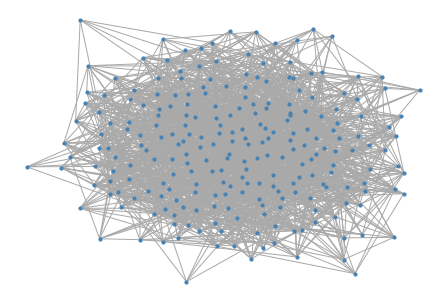

In [15]:
p_ER_Graph = H_density
ER_n_nodes = HN
ER_Graph = nx.Graph()
for u in range(ER_n_nodes):
    for v in range(u + 1, ER_n_nodes):
        if np.random.random() < p_ER_Graph:
            ER_Graph.add_edge(u, v)
            
nx.draw(ER_Graph,
        node_size = 10,
        edge_color = 'darkgray',
        node_color = 'steelblue')

In [16]:
max(H_degrees)

139

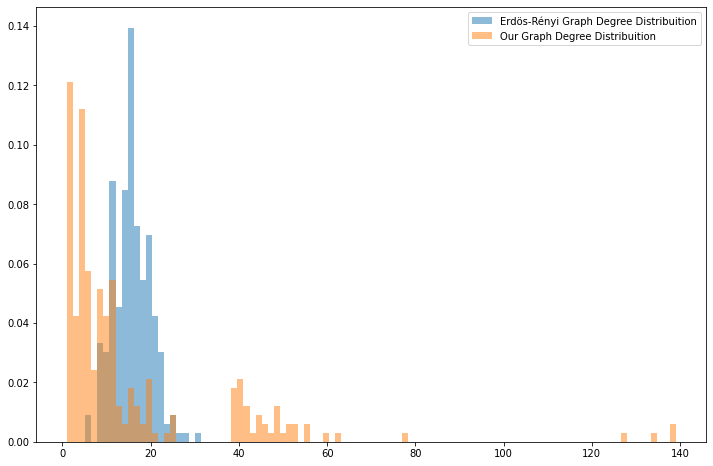

In [17]:
# comparing degree distribuitions
diff = max(H_degrees) - min(H_degrees)
len_bin = diff/100
bins = [min(H_degrees) + diff/100 * i for i in range(101)]

plt.figure(figsize = (12, 8))
plt.hist(list(np.array(ER_Graph.degree)[:,1].astype(int)),
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Erdös-Rényi Graph Degree Distribuition')

plt.hist(H_degrees,
         bins = bins,
         density = True,
         alpha = 0.5,
         label = 'Our Graph Degree Distribuition')

plt.legend(loc = 'upper right')
plt.savefig('../TeX/Second set/img/degree_comparition_without_marks.png')
plt.show()

In [18]:
D = np.array(H.degree(weight = 'weight'))
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Franjinha', '705.0'],
 ['Sansão', '607.5'],
 ['Denise', '597.5'],
 ['Astronauta', '433.0'],
 ['Xabéu', '420.5'],
 ['Xaveco', '334.0'],
 ['Capitão Feio', '311.5'],
 ['Carminha Frufru', '299.0'],
 ['Robô', '282.0'],
 ['Maria Cascuda', '265.0'],
 ['Marina', '257.5'],
 ['Dona Luísa', '237.5'],
 ['Anjinho', '233.5'],
 ['Bidu', '217.0'],
 ['Zé Luís', '196.0'],
 ['Princesa Usagi Mimi', '193.5'],
 ['Yuka', '191.5'],
 ['Penadinho', '187.5'],
 ['Tonhão da Rua de Baixo', '185.0'],
 ['Titi', '176.5'],
 ['Seu Cebola', '171.0'],
 ['Coelho Caolho', '157.0'],
 ['Zé Vampir', '154.5'],
 ['Bloguinho', '149.5'],
 ['Dudu', '149.0'],
 ['Nimbus', '142.0'],
 ['Luca', '136.0'],
 ['Professor Spada / Doutor Spam', '115.0'],
 ['Mingau', '114.5'],
 ['Jeremias', '111.0'],
 ['Monika Bond', '111.0'],
 ['Bóreas', '110.5'],
 ['Frank', '106.0'],
 ['Seu Antenor', '105.0'],
 ['Dona Lili', '102.5'],
 ['Muminho', '102.0'],
 ['Prof Jorge', '101.0'],
 ['Dona Cebola', '99.0'],
 ['Zing Mascarado', '98.0'],
 ['Dorinha', '96.0

In [19]:
D = np.array(H.degree())
D = list(sorted(D, key = lambda x : float(x[1]), reverse = True))
D = [list(d) for d in D]
i = 0

while i < len(D):
    if D[i][0] in ['Mônica', 'Cebolinha', 'Magali', 'Cascão', 'Chico Bento']:
        D.remove(D[i])
    else:
        i += 1
        
D

[['Franjinha', '78'],
 ['Bidu', '63'],
 ['Sansão', '60'],
 ['Astronauta', '56'],
 ['Denise', '55'],
 ['Mingau', '53'],
 ['Xaveco', '53'],
 ['Bloguinho', '52'],
 ['Dudu', '51'],
 ['Professor Spada / Doutor Spam', '50'],
 ['Marina', '48'],
 ['Anjinho', '48'],
 ['Xabéu', '48'],
 ['Luca', '48'],
 ['Carminha Frufru', '47'],
 ['Dorinha', '46'],
 ['Zé Luís', '46'],
 ['Maria Cascuda', '45'],
 ['Titi', '45'],
 ['Fabinho Boa Pinta', '44'],
 ['Jotalhão', '43'],
 ['Maria Cebolinha', '42'],
 ['Capitão Feio', '42'],
 ['Nimbus', '42'],
 ['Quinzinho', '42'],
 ['Do Contra', '41'],
 ['Jeremias', '41'],
 ['Humberto', '41'],
 ['Seu Juca', '40'],
 ['Teveluisão', '40'],
 ['Aninha', '40'],
 ['Alfacinha', '40'],
 ['Louco', '39'],
 ['Tikara', '39'],
 ['Keiko', '39'],
 ['Alvinho', '39'],
 ['Manezinho', '39'],
 ['Tonica', '39'],
 ['Yuka', '25'],
 ['Dona Luísa', '25'],
 ['Penadinho', '25'],
 ['Seu Cebola', '24'],
 ['Dona Lili', '21'],
 ['Seu Antenor', '20'],
 ['Coelho Caolho', '20'],
 ['Zé Vampir', '20'],
 ['Pite

In [20]:
nodes = list(H.nodes())
paths = dict(shortest_path(H))
character_to_fig = []
fig_to_fig = []
printed = False
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (H_diameter + 1):
            if u[0] != '#' and v[0] != '#':
                arrow = ' -> '
                print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
                print()
                printed = True
            elif u[0] != '#' or v[0] != '#':
                character_to_fig.append([u, v])
            else:
                fig_to_fig.append([u, v])
                
if not printed:
    if len(character_to_fig) > 0:
        u, v = character_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')
    else:
        u, v = fig_to_fig[0]
        print(f'Path from {u} to {v}:', arrow.join(paths[u][v]), sep = '\n')

Path from Pipa to Pajé:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Pajé

Path from Pipa to Cacique:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Cacique

Path from Pipa to Cafuné:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Cafuné

Path from Pipa to Jurema:
Pipa -> Tina -> Maurício de Souza -> Mônica -> Duende -> Chico Bento -> Onça -> Papa-Capim -> Jurema

Path from Pajé to Etê da Nave Mãe:
Pajé -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Cacique to Etê da Nave Mãe:
Cacique -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Cafuné to Etê da Nave Mãe:
Cafuné -> Papa-Capim -> Onça -> Chico Bento -> Duende -> Cascão -> Magali -> C-bola -> Etê da Nave Mãe

Path from Jurema to Etê da Nave Mãe:
Jurema -> Papa-Capim -> Onça -> 

In [21]:
best_friends = {}
for character in H.nodes():
    best_friend_list = []
    for i in range(3):
        best_friend = None
        best_friend_relantions = 0
        for connection in H[character]:
            if connection not in best_friend_list and H[character][connection]['weight'] > best_friend_relantions:
                best_friend = connection
                best_friend_relantions = H[character][connection]['weight']
        
        if best_friend != None:
            best_friend_list.append(best_friend)
            
    best_friends[character] = best_friend_list

best_friends

{'Mônica': ['Cebolinha', 'Magali', 'Cascão'],
 'Cebolinha': ['Mônica', 'Cascão', 'Magali'],
 'Magali': ['Mônica', 'Cebolinha', 'Cascão'],
 'Cascão': ['Cebolinha', 'Mônica', 'Magali'],
 'Yuka': ['Capitão Feio', 'Mônica', 'Cebolinha'],
 'Kraker': ['Mônica', 'Cebolinha', 'Cascão'],
 'Dona Luísa': ['Mônica', 'Magali', 'Seu Antenor'],
 'Sansão': ['Mônica', 'Cebolinha', 'Cascão'],
 'Seu Souza': ['Mônica', 'Dona Luísa', 'Sansão'],
 'Dona Lurdinha': ['Cascão', 'Cebolinha', 'Mônica'],
 'Seu Antenor': ['Dona Luísa', 'Seu Cebola', 'Dona Lili'],
 'Seu Cebola': ['Cebolinha', 'Cascão', 'Seu Antenor'],
 'Maria Cebolinha': ['Floquinho', 'Cebolinha', 'Dona Cebola'],
 'Dona Cebola': ['Cebolinha', 'Cascão', 'Mônica'],
 'Seu Carlito': ['Magali', 'Mingau', 'Aveia'],
 'Mingau': ['Magali', 'Mônica', 'Cascão'],
 'Aveia': ['Magali', 'Seu Carlito', 'Mingau'],
 'Dona Lili': ['Dona Luísa', 'Seu Cebola', 'Seu Antenor'],
 'Marina': ['Mônica', 'Cebolinha', 'Denise'],
 'Franjinha': ['Cebolinha', 'Cascão', 'Magali'],
